# Asphere Optimization

In [1]:
import numpy as np

from optiland import analysis, optic, optimization

Define a starting lens:

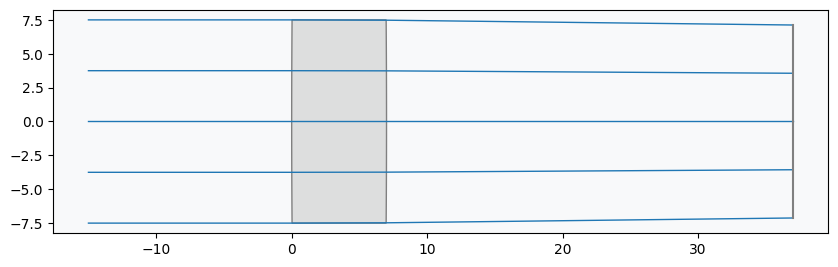

In [ ]:
lens = optic.Optic()

# add surfaces
lens.add_surface(index=0, thickness=np.inf)
lens.add_surface(
    index=1,
    thickness=7,
    radius=1000,
    material="N-SF11",
    is_stop=True,
    surface_type="even_asphere",
    coefficients=[0, 0, 0],
)
lens.add_surface(index=2, thickness=30, radius=-1000)
lens.add_surface(index=3)

# set aperture
lens.set_aperture(aperture_type="EPD", value=15)

# add field
lens.set_field_type(field_type="angle")
lens.add_field(y=0)

# add wavelength
lens.add_wavelength(value=0.55, is_primary=True)

# draw lens
lens.draw(num_rays=5)

Define optimization problem:

In [3]:
problem = optimization.OptimizationProblem()

Add operands (targets for optimization):

In [ ]:
input_data = {
    "optic": lens,
    "surface_number": -1,
    "Hx": 0,
    "Hy": 0,
    "num_rays": 5,
    "wavelength": 0.55,
    "distribution": "hexapolar",
}

# add RMS spot size operand
problem.add_operand(
    operand_type="rms_spot_size",
    target=0,
    weight=1,
    input_data=input_data,
)

Define variables - let radius of curvature vary and the first 3 aspheric coefficients.

In [5]:
problem.add_variable(lens, "radius", surface_number=1)
problem.add_variable(lens, "radius", surface_number=2)
problem.add_variable(lens, "asphere_coeff", surface_number=1, coeff_number=0)
problem.add_variable(lens, "asphere_coeff", surface_number=1, coeff_number=1)
problem.add_variable(lens, "asphere_coeff", surface_number=1, coeff_number=2)

Check initial merit function value and system properties:

In [6]:
problem.info()

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │                30.0924 │                 0 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤════════════════╤══════════╤══════════╤═════════╤═════════╤════════════════════╕
│    │ Operand Type   │   Target │   Weight │   Value │   Delta │   Contribution (%) │
╞════╪════════════════╪══════════╪══════════╪═════════╪═════════╪════════════════════╡
│  0 │ rms spot size  │        0 │        1 │ 5.48566 │ 5.48566 │                100 │
╘════╧════════════════╧══════════╧══════════╧═════════╧═════════╧════════════════════╛
╒════╤═════════════════╤═══════════╤═════════╤══════════════╤══════════════╕
│    │ Variable Type   │   Surface │   Value │ Min. Bound   │ Max. Bound   │
╞════╪═════════════════╪═══════════╪═════════╪══════════════╪══════════════╡
│  0 │ radius          │         1 │    1000 │              │             

Define optimizer:

In [7]:
optimizer = optimization.OptimizerGeneric(problem)

Run optimization:

In [8]:
optimizer.optimize(tol=1e-6)

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 3.304334492892647e-10
        x: [-2.743e+01  2.416e+01  1.898e+02  2.174e+00 -2.770e-02]
      nit: 20
      jac: [-5.865e-09  3.570e-09  8.185e-08 -1.807e-07 -1.921e-07]
     nfev: 150
     njev: 25
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>

Print merit function value and system properties after optimization:

In [9]:
problem.info()

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │            3.30432e-10 │               100 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤════════════════╤══════════╤══════════╤═════════════╤═════════════╤════════════════════╕
│    │ Operand Type   │   Target │   Weight │       Value │       Delta │   Contribution (%) │
╞════╪════════════════╪══════════╪══════════╪═════════════╪═════════════╪════════════════════╡
│  0 │ rms spot size  │        0 │        1 │ 1.81778e-05 │ 1.81778e-05 │                100 │
╘════╧════════════════╧══════════╧══════════╧═════════════╧═════════════╧════════════════════╛
╒════╤═════════════════╤═══════════╤═════════════════╤══════════════╤══════════════╕
│    │ Variable Type   │   Surface │           Value │ Min. Bound   │ Max. Bound   │
╞════╪═════════════════╪═══════════╪═════════════════╪══════════════╪══════════════╡
│  0 │ rad

Draw final lens:

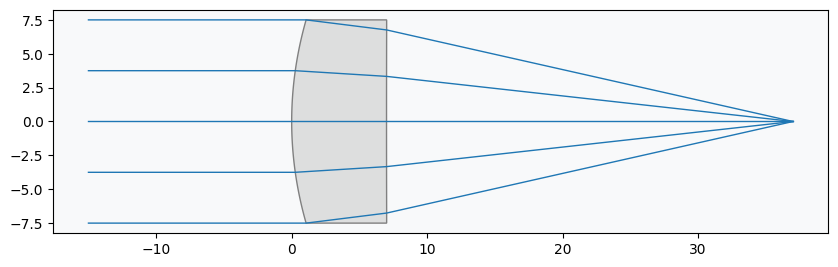

In [10]:
lens.draw(num_rays=5)

Viewing the spot diagram indicates that the spot size is indeed minimized and that the lens is diffraction limited.

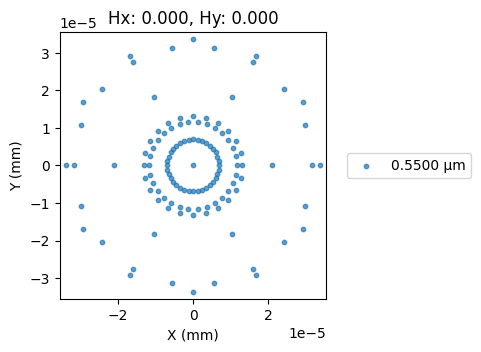

In [11]:
spot = analysis.SpotDiagram(lens)
spot.view()